<div style="text-align:center; font-family:Tahoma, Arial; line-height:1.8;">

  <div style="font-size:42px; font-weight:bold; color:#0F8298;">
    Machine Learning 04
  </div>

  <div style="font-size:28px; font-weight:600; color:#6C3BAA; margin-top:8px;">
  Regression / Non Linear Regression
  </div>

  <div style="font-size:18px; color:#4b4f9c;">
</div>
تجزیه و تحلیل رگرسیون غیرخطی

<hr style="width:60%; margin:20px auto; border:1px solid #ddd;">

<font color=497890 size=3>

اهداف: : پس از تکمیل این تمرین شما قادر خواهید بود

بین رگرسیون خطی و غیرخطی تمایز قائل شوید

از مدل رگرسیون غیرخطی در پایتون استفاده کنید

<font color=GREEN size=5>
HAKAN Fatemi (www.hooko.ir)


____
</div> </div>

اگر داده‌ها یک روند **خمیده** داشته باشند، رگرسیون خطی نتایج چندان دقیقی نسبت به رگرسیون غیرخطی ارائه نمی‌دهد

زیرا رگرسیون خطی فرض می‌کند که داده‌ها **خطی** هستند

بیایید درباره‌ی **رگرسیون غیرخطی** بیاموزیم و یک مثال در پایتون پیاده کنیم

در این نوت‌بوک، ما یک مدل غیرخطی را بر روی نقاط داده مربوط به **تولید ناخالص داخلی چین** از سال ۱۹۶۰ تا ۲۰۱۴ برازش می‌کنیم

<h2 id="importing_libraries">Importing required libraries</h2>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

اگرچه رگرسیون خطی می‌تواند در مدل‌سازی برخی مجموعه‌داده‌ها عملکرد خوبی داشته باشد، 

اما نمی‌توان از آن برای همه‌ی مجموعه‌داده‌ها استفاده کرد

ابتدا به یاد بیاورید که رگرسیون خطی چگونه یک مجموعه‌داده را مدل‌سازی می‌کند: این روش 

را مدل می‌کند x و متغیرهای مستقل y **رابطه خطی** بین متغیر وابسته

. معادله‌ی آن ساده و از درجه ۱ است، به‌عنوان مثال 

$$y = 2x + 3$$

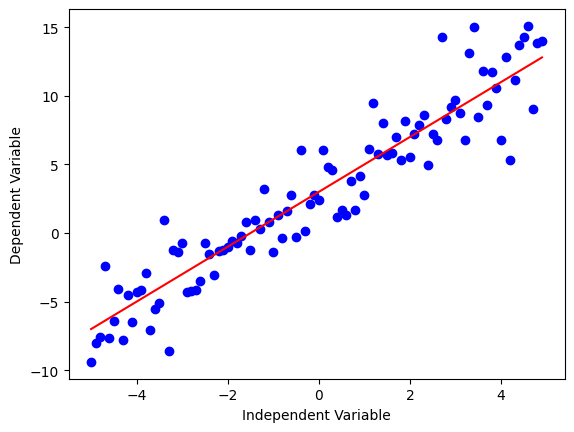

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

# می‌توانید شیب و عرض از مبدأ را تنظیم کنید تا تغییرات نمودار را بررسی کنید
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  "bo")
plt.plot(x,y, "r") 
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
plt.show()

رگرسیون غیرخطی روشی است برای مدل‌سازی **رابطه غیرخطی**
در اصل، هر رابطه‌ای که خطی نباشد، می‌تواند به‌عنوان غیرخطی در نظر گرفته شود 

نمایش داده می‌شود ((x) بیشینه توان) (k) معمولاً با یک چندجمله‌ای درجه

به‌عنوان مثال

$$ \ y = a x^3 + b x^2 + c x + d \ $$

توابع غیرخطی می‌توانند شامل عناصر مانند **نمایی‌ها، لگاریتم‌ها، کسرها** و غیره باشند.
به‌عنوان مثال
 $$ y = \log(x)$$

می‌توانیم تابعی داشته باشیم که حتی پیچیده‌تر باشد، مانند
$$ y = \log(a x^3 + b x^2 + c x + d)$$


بیایید نگاهی به نمودار یک **تابع مکعبی** بیندازیم

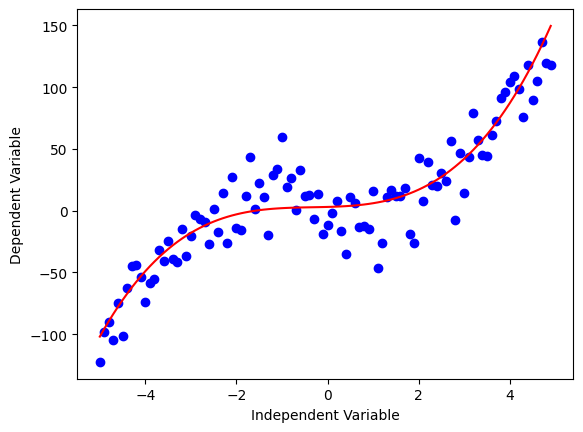

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

# می‌توانید شیب و عرض از مبدأ را تنظیم کنید تا تغییرات نمودار را مشاهده کنید
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  "bo")
plt.plot(x,y, "r") 
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
plt.show()

همانطور که مشاهده می‌کنید، این تابع دارای $x^3$ و $x^2$ به عنوان متغیرهای مستقل است. همچنین نمودار این تابع بر روی صفحه دو بعدی یک خط راست نیست. بنابراین این یک تابع غیرخطی است.

:برخی دیگر از انواع توابع غیرخطی عبارت‌اند از

### درجه دوم


$$ Y = X^2 $$


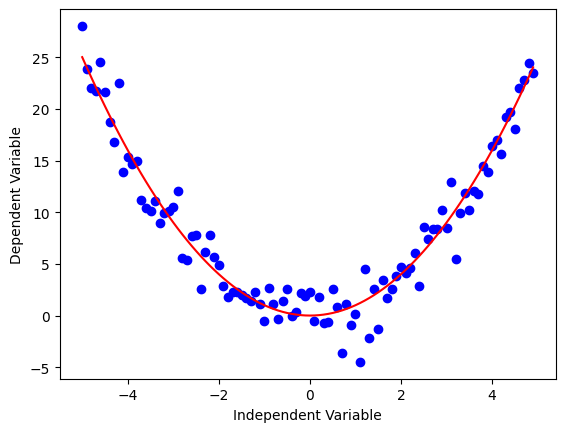

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

# می‌توانید شیب و عرض از مبدأ را تنظیم کنید تا تغییرات در نمودار را بررسی کنید

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  "bo")
plt.plot(x,y, "r") 
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
plt.show()

# نمایی


صورت زیر تعریف می‌شود C یک تابع نمایی با پایه 

 $$ Y = a + b c^X$$

 :که در آن
 * b ≠ ۰
 * c > ۰
 * c ≠ ۱
 * هر عدد حقیقی است x 


در این تابع، پایه $(c)$ ثابت و توان $(x)$ یک متغیر است


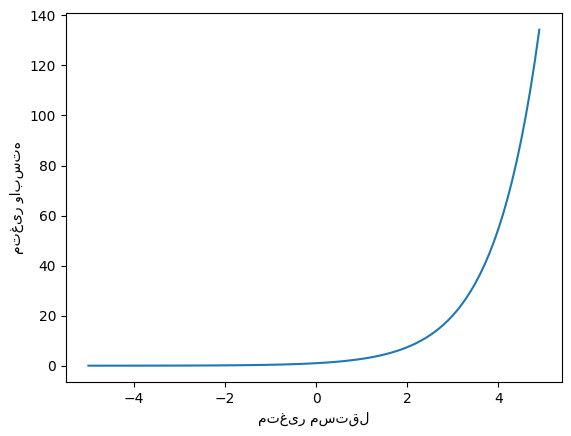

In [5]:
X = np.arange(-5.0, 5.0, 0.1)

# می‌توانید شیب و عرض از مبدأ را تنظیم کنید تا تغییرات نمودار را مشاهده کنید

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel("متغیر وابسته")
plt.xlabel("متغیر مستقل")
plt.show()

### لگاریتمی

پاسخ $y$ حاصل اعمال نگاشت لگاریتمی از ورودی $x$ به خروجی $y$ است. این یکی از ساده‌ترین اشکال $log()$ می‌باشد، به این صورت $$ y = \log(x)$$

لطفاً در نظر داشته باشید که به جای $x$، می‌توانیم از $X$ استفاده کنیم، که می‌تواند نمایش چندجمله‌ای از مقادیر $x$ باشد. به صورت کلی به این شکل نوشته می‌شود
\begin{equation}
y = \log(X)
\end{equation}

C:\Users\mrb\AppData\Local\Temp\ipykernel_10200\1016157659.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


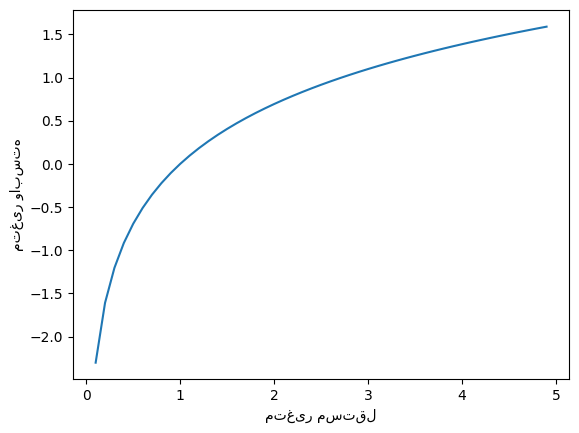

In [6]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel("متغیر وابسته")
plt.xlabel("متغیر مستقل")
plt.show()

### سیگموئیدی / لجستیک


$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$


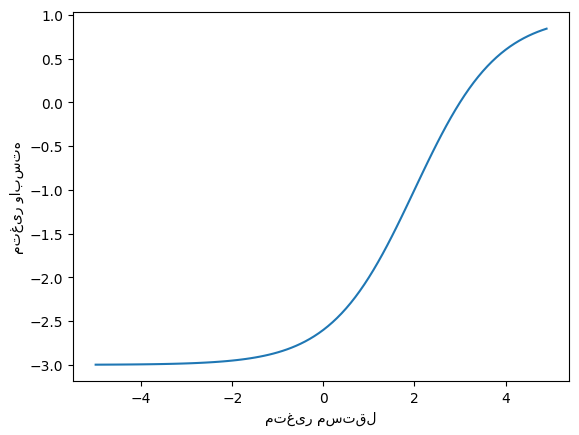

In [7]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel("متغیر وابسته")
plt.xlabel("متغیر مستقل")
plt.show()

<a id="ref2"></a>

# مثال رگرسیون غیرخطی


برای مثال، قصد داریم یک مدل **غیرخطی** بر روی نقاط داده مربوط به **تولید ناخالص داخلی چین** از سال ۱۹۶۰ تا ۲۰۱۴ برازش کنیم. ما یک مجموعه‌داده با دو ستون دانلود می‌کنیم: ستون اول شامل سال‌ها از ۱۹۶۰ تا ۲۰۱۴ و ستون دوم شامل **درآمد ناخالص سالانه چین به دلار آمریکا** برای آن سال است.


In [8]:
import requests

# downloading dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
response = requests.get(url)

with open("china_gdp.csv", "wb") as f:
    f.write(response.content)

In [9]:
import numpy as np
import pandas as pd
    
df = pd.read_csv(r"china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### ترسیم مجموعه‌داده

این شکل نقاط داده را نشان می‌دهد. به نظر می‌رسد که شبیه یک **تابع لجستیک یا نمایی** باشد. رشد در ابتدا کند است، سپس از سال ۲۰۰۵ به بعد رشد بسیار چشمگیر می‌شود و نهایتاً در دهه ۲۰۱۰ کمی کاهش می‌یابد.

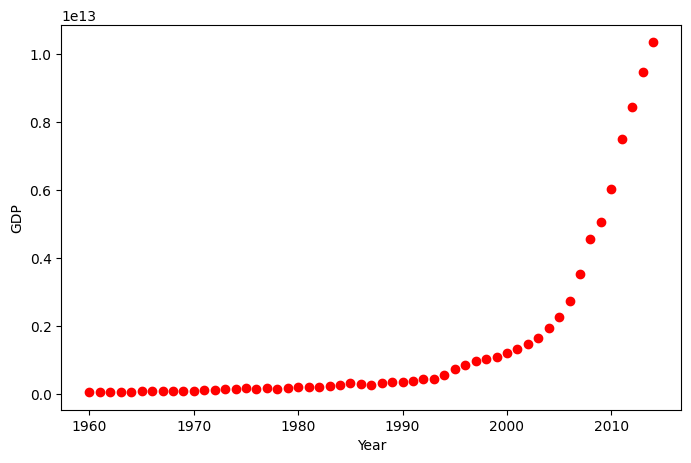

In [10]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, "ro")
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

### انتخاب مدل

با نگاه اولیه به نمودار، مشخص می‌کنیم که **تابع لجستیک** می‌تواند تقریب مناسبی باشد، زیرا ویژگی‌های آن شامل شروع با رشد کند، افزایش رشد در میانه و سپس کاهش رشد در انتها است، همان‌طور که در شکل زیر نشان داده شده است

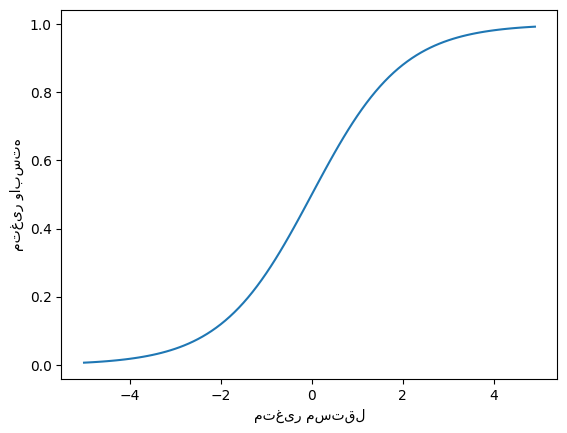

In [11]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel("متغیر وابسته")
plt.xlabel("متغیر مستقل")
plt.show()

فرمول تابع لجستیک به شکل زیر است:

$$\hat{Y} = \frac{1}{1 + e^{\beta_1 (X - \beta_2)}}$$

* $β_1$: شیب منحنی را کنترل می‌کند،
* $β_2$: جابجا می‌کند (x) منحنی را روی محور

### ساخت مدل

اکنون بیایید مدل رگرسیون خود را بسازیم و پارامترهای آن را مقداردهی اولیه کنیم.


In [12]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

بیایید یک **خط سیگموئید نمونه** را که ممکن است با داده‌ها منطبق باشد، بررسی کنیم


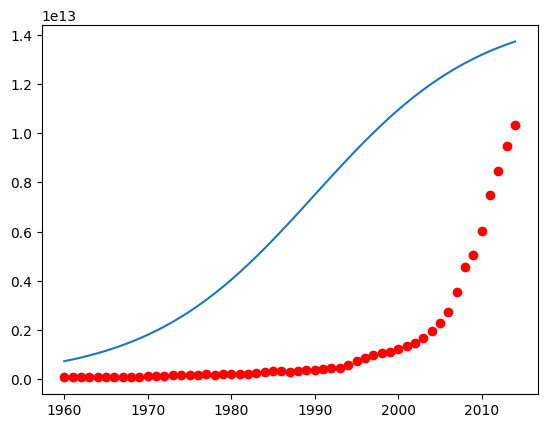

In [13]:
beta_1 = 0.10
beta_2 = 1990.0

# تابع لجستیک
Y_pred = sigmoid(x_data, beta_1 , beta_2)

# نمودار پیش‌بینی اولیه در مقابل نقاط داده
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, "ro")

وظیفه‌ی ما در اینجا یافتن بهترین پارامترها برای مدل است

کنیم **نرمال‌سازی** را $x$ و $y$ ابتدا بیایید مقادیر


In [14]:
# بیایید داده‌های خود را نرمال‌سازی کنیم
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### چگونه بهترین پارامترها را برای خط برازش پیدا کنیم؟

استفاده کنیم که با استفاده از حداقل مربعات غیرخطی تابع سیگموئید ما را به داده برازش می‌دهد **curve_fit** می‌توانیم از تابع

به حداقل برسد `sigmoid(xdata, *popt)` و `ydata` مقادیر بهینه برای پارامترها به‌گونه‌ای انتخاب می‌شوند که بین 


**مجموع مربعات باقیمانده‌ها**  

پارامترهای بهینه شده‌ی ما هستند `popt`


In [15]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, xdata, ydata)

# چاپ پارامترهای نهایی
print("β₁ = %f, \nβ₂ = %f" % (popt[0], popt[1]))

β₁ = 690.451711, 
β₂ = 0.997207


اکنون مدل رگرسیون حاصل را ترسیم می‌کنیم

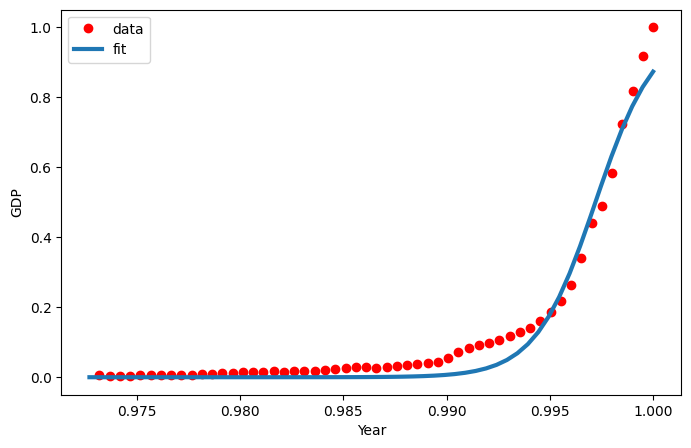

In [16]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)

plt.figure(figsize=(8,5))

y = sigmoid(x, *popt)

plt.plot(xdata, ydata, "ro", label="data")
plt.plot(x,y, linewidth=3.0, label="fit")
plt.legend(loc="best")
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

## Practice

می‌توانید دقت مدل خود را با استفاده از مقایسه‌ی **مقادیر پیش‌بینی‌شده** و **مقادیر واقعی** محاسبه کنید

In [17]:
# کد خود را اینجا بنویسید




<details><summary>برای مشاهده‌ی پاسخ، اینجا کلیک کنید</summary>

```python
# تقسیم داده‌ها به مجموعه آموزشی و آزمایشی
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# ساخت مدل با استفاده از مجموعه آموزشی
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# پیش‌بینی با استفاده از مجموعه آزمایشی
y_hat = sigmoid(test_x, *popt)

# ارزیابی
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

```

</details>



<h2>می‌خواهید بیشتر یاد بگیرید؟</h2>

پلتفرم **هوکو** یک بستر جامع تحلیلی و هوش مصنوعی است که مجموعه‌ای از الگوریتم‌های یادگیری ماشین، ابزارهای تحلیل داده و راهکارهای پیش‌بینی هوشمند را در اختیار شما قرار می‌دهد.
این پلتفرم به شما کمک می‌کند تا تصمیم‌های دقیق‌تر، سریع‌تر و مبتنی بر داده بگیرید؛ 

چه به‌صورت فردی، چه در سطح تیمی و یا در مقیاس سازمانی

___

اکنون می‌توانید نسخه آزمایشی رایگان هوکو را فعال کرده و قدرت هوش مصنوعی را در تصمیم‌گیری‌های خود تجربه کنید

 <a href="https://hooko.ir">HOOKO.ir شروع تجربه در </a>

 ___

## Author

Mahdi Fatemi (HAKAN)

## web
www.hooko.ir

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2025-11-06 | 1.0  | HAKAN Fatemi  |  ... |

## <h3 align="center"> © HOOKO.IR Corporation. All rights reserved. <h3/>
